In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# 1. Fonctions

In [2]:
def initialisation(n0, n1, n2):
    
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [3]:
# Notre fonction de model que nous allons nommé forward_propagation
def forward_propagation(X, parametres):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1': A1,
        'A2': A2
    }
    
    return activations

In [4]:
# Notre fonction des gradients que nous allons nommé back_propagation

In [5]:
def back_propagation(X, y, activations, parametres):
    
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True) # le "keepdims" permettra de garder la dimension (à 2 dans notre cas) : effet de Broadcasting
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return gradients

In [6]:
def update(gradients, parametres, learning_rate):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [7]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [8]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [9]:
# n1: Nombre de neurones dans notre première couche de neurones
def neural_network(X_train, y_train, n1, learning_rate = 0.01, n_iter = 1000):
    
    # Initialisation de W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc  = []
    
    for i in tqdm(range(n_iter)):
        
        activations = forward_propagation(X_train, parametres)
        gradients   = back_propagation(X_train, y_train, activations, parametres)
        parametres  = update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
    plt.figure(figsize=(14, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='Train acc')
    plt.legend()
    
    # A modifier pour mieux voir les choses => code sur Tepee 
    plt.subplot(1, 3, 3)
    plt.scatter(X_train[0, :], X_train[1, :], c=y_train, cmap='summer')
    plt.show()
    
    return parametres

In [10]:
# n1: Nombre de neurones dans notre première couche de neurones
def neural_network2(X_train, y_train, X_test, y_test, n1, learning_rate = 0.01, n_iter = 1000):
    
    # TRAIN : Initialisation de W, b
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)
    
    # TEST : Initialisation de W, b
    t_n0 = X_train.shape[0]
    t_n2 = y_train.shape[0]
    t_parametres = initialisation(t_n0, n1, t_n2)
    
    train_loss = []
    train_acc  = []
    test_loss  = []
    test_acc   = []
    
    for i in tqdm(range(n_iter)):
        
        # TRAIN
        activations = forward_propagation(X_train, parametres)
        gradients   = back_propagation(X_train, y_train, activations, parametres)
        parametres  = update(gradients, parametres, learning_rate)
        
        # TEST
        t_activations = forward_propagation(X_test, t_parametres)
        t_gradients   = back_propagation(X_test, y_test, t_activations, t_parametres)
        t_parametres  = update(t_gradients, t_parametres, learning_rate)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations['A2']))
            y_pred = predict(X_train, parametres)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)
            
            # Test
            test_loss.append(log_loss(y_test, t_activations['A2']))
            y_pred = predict(X_test, t_parametres)
            current_accuracy = accuracy_score(y_test.flatten(), y_pred.flatten())
            test_acc.append(current_accuracy)
            
    plt.figure(figsize=(14, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(test_loss, label='Test Loss')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(train_acc, label='Train acc')
    plt.plot(test_acc, label='Test acc')
    plt.legend()
    
    return parametres

# 2. Dataset - Test

Dimensions de X: (2, 100)
Dimensions de y: (1, 100)


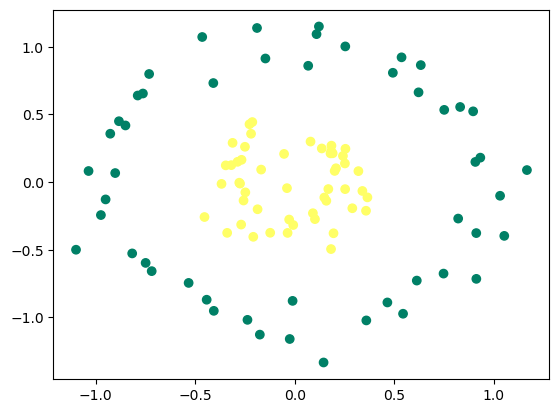

In [11]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('Dimensions de X:', X.shape)
print('Dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 19032.61it/s]


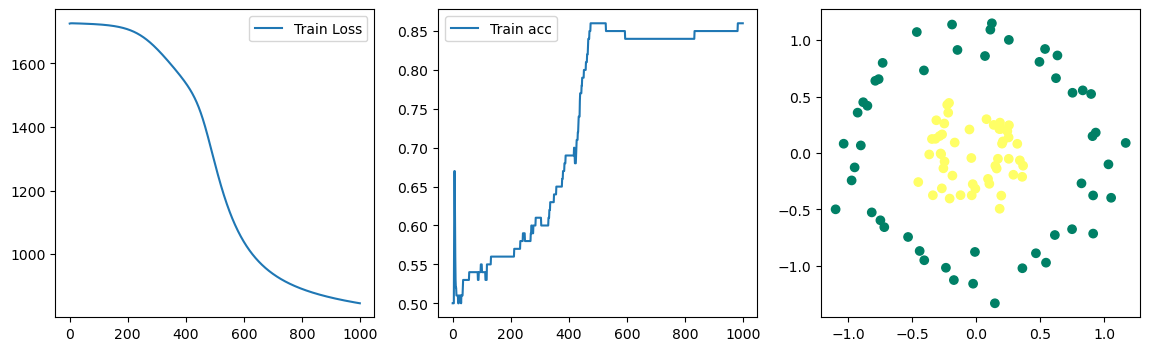

In [12]:
parametres = neural_network(X, y, n1=2, learning_rate=0.1, n_iter=10000)

# 3. Test Cat vs Dog 

In [13]:
from utilities import *

/Users/anisoft/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


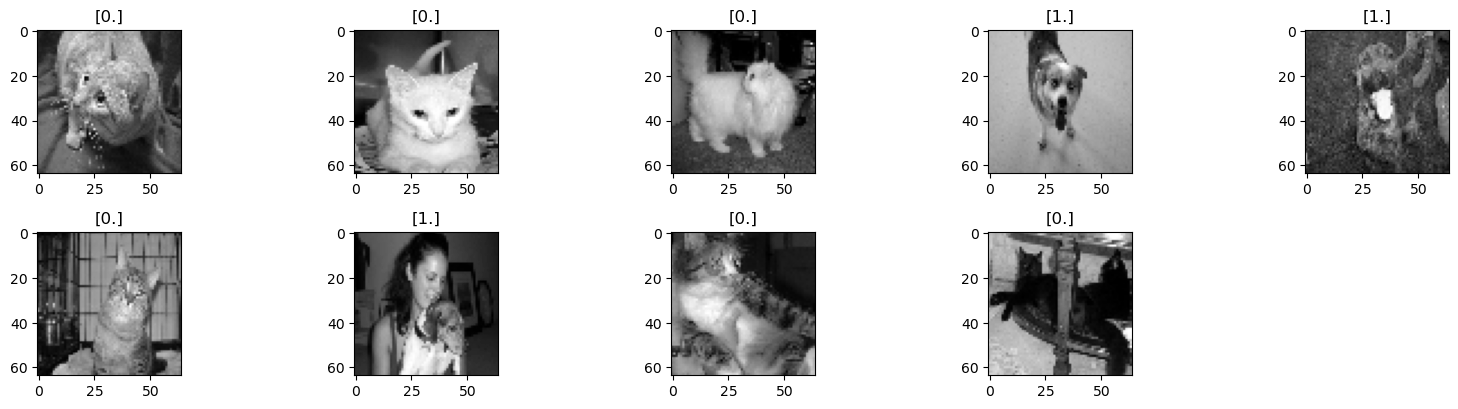

In [14]:
X_train, y_train, X_test, y_test = load_data()

plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 64, 64)
(200, 64, 64)
(1000, 1)
(200, 1)


In [16]:
y_train = y_train.T
y_test = y_test.T

X_train = X_train.T
X_train_reshape = X_train.reshape(-1, X_train.shape[-1]) / X_train.max()

X_test = X_test.T
X_test_reshape = X_test.reshape(-1, X_test.shape[-1]) / X_test.max()

m_train = 300
m_test = 80
X_train_reshape = X_train_reshape[:, :m_train]
X_test_reshape = X_test_reshape[:, :m_test]
y_train = y_train[:, :m_train]
y_test = y_test[:, :m_test]

print(X_train_reshape.shape)
print(X_test_reshape.shape)
print(y_train.shape)
print(y_test.shape)

(4096, 300)
(4096, 80)
(1, 300)
(1, 80)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:13<00:00, 74.72it/s]


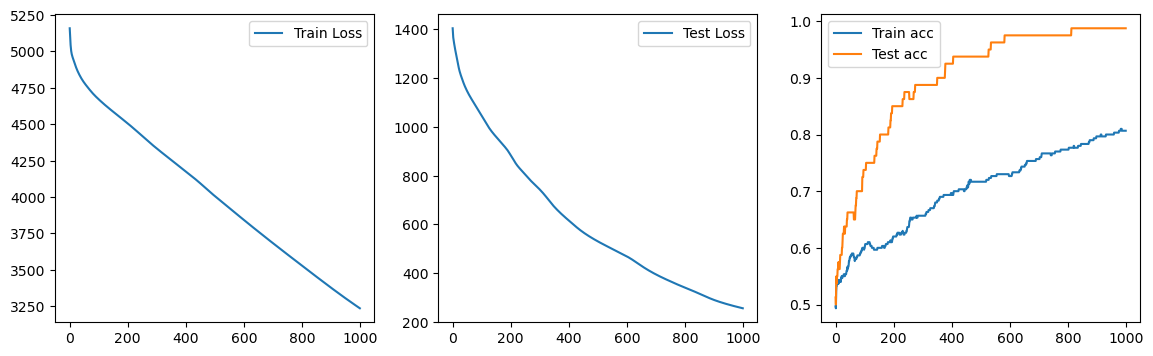

In [17]:
parametres1 = neural_network2(X_train_reshape, y_train, X_test_reshape, y_test, n1=32, learning_rate=0.01, n_iter=10000)